In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

In [69]:
wine = load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names
features = wine.feature_names

In [74]:
data = pd.DataFrame(X,columns=features)

In [75]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
X_scaled.shape

(178, 13)

In [49]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [50]:
X_pca.shape

(178, 2)

In [51]:
df_pca = pd.DataFrame(data=X_pca, columns=['pc1','pc2'])
df_pca['Target'] = y

<Axes: xlabel='pc1', ylabel='pc2'>

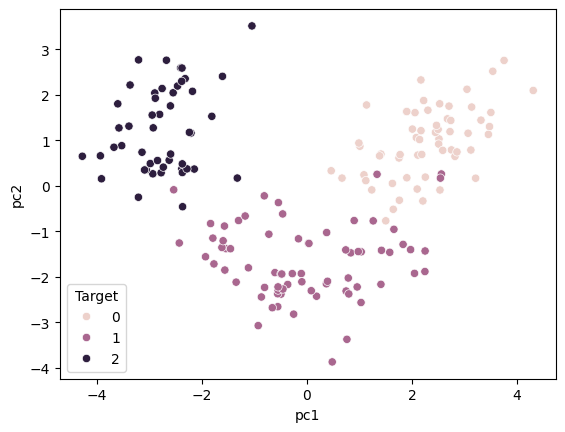

In [52]:
sns.scatterplot(data=df_pca, x='pc1', y='pc2', hue='Target')

In [53]:

pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [54]:
X.shape[1] + 1

14

In [55]:
pca_full = PCA()
pca_full.fit(X_scaled)

PCA()

In [56]:
exp_var = pca_full.explained_variance_ratio_
exp_var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

<BarContainer object of 13 artists>

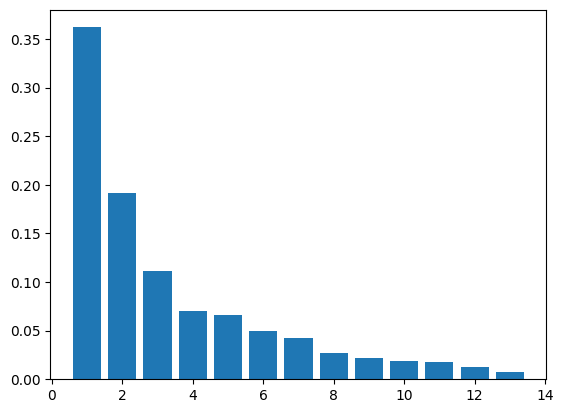

In [57]:
plt.bar(range(1,14), exp_var)

In [61]:
cum_exp_var = pca_full.explained_variance_ratio_.cumsum()

In [62]:
cum_exp_var

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

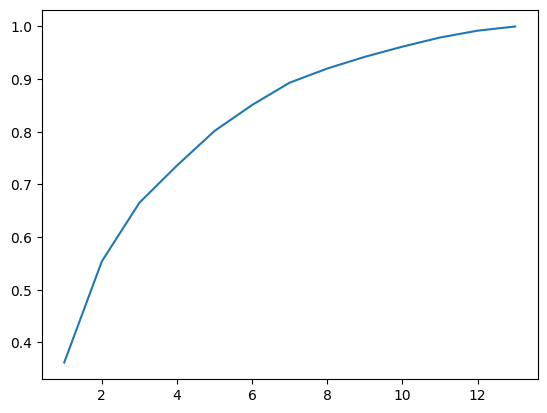

In [63]:
plt.plot(range(1,14), cum_exp_var)

In [43]:
features = wine.feature_names

In [65]:
pca.components_.T

array([[ 0.1443294 ,  0.48365155],
       [-0.24518758,  0.22493093],
       [-0.00205106,  0.31606881],
       [-0.23932041, -0.0105905 ],
       [ 0.14199204,  0.299634  ],
       [ 0.39466085,  0.06503951],
       [ 0.4229343 , -0.00335981],
       [-0.2985331 ,  0.02877949],
       [ 0.31342949,  0.03930172],
       [-0.0886167 ,  0.52999567],
       [ 0.29671456, -0.27923515],
       [ 0.37616741, -0.16449619],
       [ 0.28675223,  0.36490283]])

In [79]:
loadings = pd.DataFrame(pca.components_.T, 
                        columns=['pc1','pc2'],
                        index=features)
print(loadings)

                                   pc1       pc2
alcohol                       0.144329  0.483652
malic_acid                   -0.245188  0.224931
ash                          -0.002051  0.316069
alcalinity_of_ash            -0.239320 -0.010591
magnesium                     0.141992  0.299634
total_phenols                 0.394661  0.065040
flavanoids                    0.422934 -0.003360
nonflavanoid_phenols         -0.298533  0.028779
proanthocyanins               0.313429  0.039302
color_intensity              -0.088617  0.529996
hue                           0.296715 -0.279235
od280/od315_of_diluted_wines  0.376167 -0.164496
proline                       0.286752  0.364903


In [80]:
pca = PCA(n_components=8)
reduced = pca.fit_transform(X_scaled)

In [81]:
reduced.shape

(178, 8)

### visualizing

In [82]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

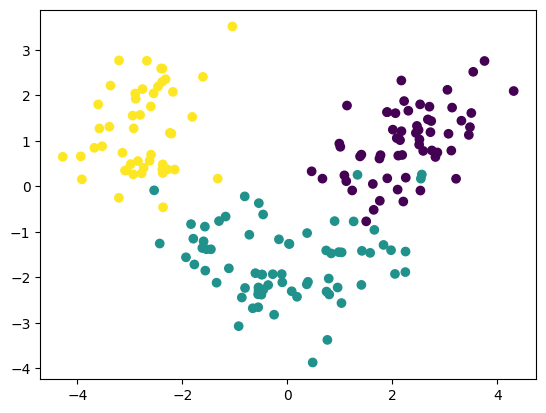

In [84]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)